In [70]:
import numpy as np


def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])


def r_precision(r):
    r = np.asarray(r) != 0
    z = r.nonzero()[0]
    if not z.size:
        return 0.
    return np.mean(r[:z[-1] + 1])


def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)


def average_precision(r,max_k):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(max_k) if r[k]]
    if not out:
        return 0.
    return np.mean(out)


def mean_average_precision_at_k(rs,max_k):
    return np.mean([average_precision(r,max_k) for r in rs])

# def dcg_at_k(r, k, method=0):
#     r = np.asfarray(r)[:k]
#     if r.size:
#         if method == 0:
#             return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
#         elif method == 1:
#             return np.sum(r / np.log2(np.arange(2, r.size + 2)))
#         else:
#             raise ValueError('method must be 0 or 1.')
#     return 0.


# def ndcg_at_k(r, k, method=0):
#     dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
#     if not dcg_max:
#         return 0.
#     return dcg_at_k(r, k, method) / dcg_max

#KAGGLE
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.


def ndcg_at_k(r, k):
    idcg = dcg_at_k(sorted(r, reverse=True), k)
    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg

In [124]:
import pandas as pd
import numpy as np

df = pd.read_csv('../csv/statistics.csv')
df = df.dropna()
df.head(12)

searchers = list(df).copy()
del searchers[0]

print(df['query'].tolist())
print(searchers)

for query in range(df['query'].size):
    for searcher in range(len(searchers)):
        mt = pd.read_csv('../'+df.iloc[query][searcher+1])
        df.iloc[query][searcher+1] = mt
        
#Searchers Used
#print(searchers)
arr_s = ['npmjs.com_optimal', 'npmsearch.com', 'M1', 'M2',
         'BordaFuse', 'Cordorcet', 'BoostedBordaFuse', 'WeightedBordaFuse', 
         'Filter_google.com_hyp_match']
arr_searchers = pd.Series(arr_s)

#Queries Used
#print(df['query'].tolist())
arr_queries = pd.Series(['download free music', 'download web videos', 'check valid email address',
                         'send sms', 'extract barcode from image', 'sentiment analysis', 'quick sort algorithm',
                         'convert typewritten image to text', 'user authentication', 'filter adult content images',
                         'convert data formats'])

df_copy = df[['query']+arr_s]
df_copy.head(20)

['download free music', 'download web videos', 'check valid email address', 'send sms', 'extract barcode from image', 'sentiment analysis', 'quick sort algorithm', 'convert data formats', 'third party authentication', 'calculate word similarity', 'convert typewritten image to text', 'user authentication', 'filter adult content images', 'convert text to speech']
['npmjs.com_optimal', 'npmsearch.com', 'M1', 'M2', 'M3', 'M4', 'BordaFuse', 'Cordorcet', 'BoostedBordaFuse', 'WeightedBordaFuse', 'Filter_google.com_hyp_match']


,query,npmjs.com_optimal,npmsearch.com,M1,M2,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedBordaFuse,Filter_google.com_hyp_match
0,download free music,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...
1,download web videos,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...
2,check valid email address,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...
3,send sms,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...
4,extract barcode from image,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...
5,sentiment analysis,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...
6,quick sort algorithm,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...
7,convert data formats,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure hi...
8,third party authentication,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...,k #hits precision recall fmeasure ...
9,calculate word similarity,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...,k #hits precision recall fmeasure hi...


In [125]:
#df = pd.DataFrame([list(s1), list(s2)],  columns =  ["A", "B", "C"])

max_k = 21
resultall = []
result_precision = []
result_hits = []
result_recall = []
result_fmeasure = []
result_ndcg_k = []
result_mean_average_precision = []

#Calculo de precision, recall y hits
for k in range(1,max_k):
    #print(k)
    searchersrow = []
    row_precision = []
    row_hits = []
    row_recall = []
    row_fmeasure = []
    row_ndcg_k = []
    row_mean_average_precision = []
       
    for searcher in range(arr_searchers.size):
        #print(arr_searchers[searcher])
        sum_hits = 0
        sum_precision = 0
        sum_recall = 0
        sum_fmeasure = 0
        sum_ndcg_k = 0
        arr_rs = []    
    
        for query in range(arr_queries.size):
            #print(arr_queries[query])
            idxq = df_copy.index[df_copy['query'] == arr_queries[query]].tolist()
            idxs = searcher
            #print("idxq[0]:"+ str(idxq[0]) + "[idxs+1]" + str([idxs+1]))
            sxq = df_copy.iloc[idxq[0]][idxs+1]
            sxq = sxq.set_index('k')
            sum_hits += sxq.loc[k]['#hits']
            sum_precision += sxq.loc[k]['precision']
            sum_recall += sxq.loc[k]['recall']
            sum_fmeasure += sxq.loc[k]['fmeasure']
            sum_ndcg_k += ndcg_at_k(sxq['hit'],k)
            arr_rs.append(sxq['hit']);
            
        prom_hits = sum_hits/arr_queries.size
        prom_precision = sum_precision/arr_queries.size
        prom_recall = sum_recall/arr_queries.size
        prom_fmeasure = sum_fmeasure/arr_queries.size
        prom_ndcg_k = sum_ndcg_k/arr_queries.size
        mean_average_precision = mean_average_precision_at_k(arr_rs,k)
        #print(prom_hits)
        #print(prom_precision)
        #print(prom_recall)
        #print(prom_fmeasure)
        searcherprom = pd.DataFrame([[prom_hits,prom_precision,prom_recall,prom_fmeasure,prom_ndcg_k,mean_average_precision]],  columns =  ["hits", "precision", "recall", "fmeasure","ncdg","map"])
        searchersrow.append(searcherprom)
        row_precision.append(prom_precision)
        row_hits.append(prom_hits)
        row_recall.append(prom_recall)
        row_fmeasure.append(prom_fmeasure)
        row_ndcg_k.append(prom_ndcg_k)
        row_mean_average_precision.append(mean_average_precision)
    #print(searchersrow)
    resultall.append([k]+searchersrow)
    result_precision.append([k]+row_precision)
    result_hits.append([k]+row_hits)
    result_recall.append([k]+row_recall)
    result_fmeasure.append([k]+row_fmeasure)
    result_ndcg_k.append([k]+row_ndcg_k)
    result_mean_average_precision.append([k]+row_mean_average_precision)

columnsk = ['k'] + arr_searchers
dataframek = pd.DataFrame(resultall, columns =  ['k'] + arr_searchers.tolist())
dataframek = dataframek.set_index('k')
dataframek.head(3)

dataframe_hits = pd.DataFrame(result_hits, columns =  ['k'] + arr_searchers.tolist())
dataframe_recall = pd.DataFrame(result_recall, columns =  ['k'] + arr_searchers.tolist())
dataframe_fmeasure = pd.DataFrame(result_fmeasure, columns =  ['k'] + arr_searchers.tolist())
dataframe_precision = pd.DataFrame(result_precision, columns =  ['k'] + arr_searchers.tolist())
dataframe_ndcg_k = pd.DataFrame(result_ndcg_k, columns =  ['k'] + arr_searchers.tolist())
dataframe_average_precision = pd.DataFrame(result_mean_average_precision, columns =  ['k'] + arr_searchers.tolist())

dataframe_ndcg_k.head(20)


,k,npmjs.com_optimal,npmsearch.com,M1,M2,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedBordaFuse,Filter_google.com_hyp_match
0,1,0.727273,0.272727,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.636364
1,2,0.692104,0.365253,0.783013,0.783013,0.783013,0.712677,0.783013,0.783013,0.636364
2,3,0.698644,0.335670,0.748604,0.727273,0.748604,0.716101,0.727273,0.748604,0.615033
3,4,0.709845,0.350015,0.726147,0.723686,0.756715,0.699109,0.738971,0.758865,0.628881
4,5,0.733620,0.347400,0.736535,0.734397,0.777349,0.739228,0.761932,0.793595,0.672835
5,6,0.729011,0.355333,0.744811,0.742904,0.750899,0.726687,0.746943,0.788986,0.694302
6,7,0.725515,0.361349,0.761660,0.759928,0.779487,0.737334,0.767564,0.797320,0.696538
7,8,0.730004,0.366108,0.762318,0.767978,0.783386,0.754848,0.772415,0.801808,0.706984
8,9,0.727234,0.369992,0.770835,0.776095,0.784387,0.764255,0.780624,0.799039,0.708427
9,10,0.724920,0.361669,0.785068,0.784209,0.792338,0.779231,0.788815,0.806983,0.709633


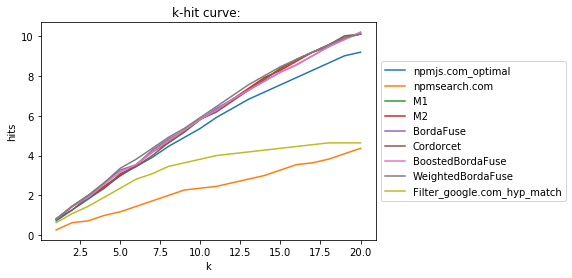

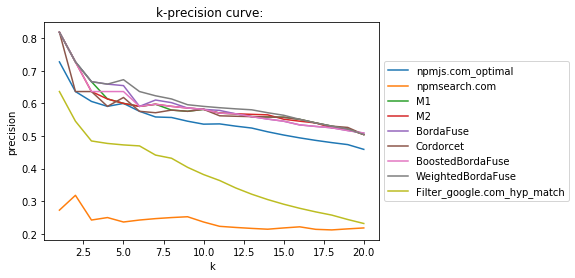

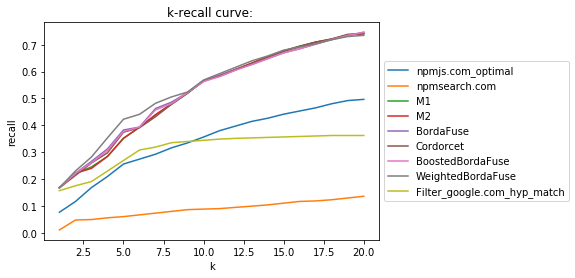

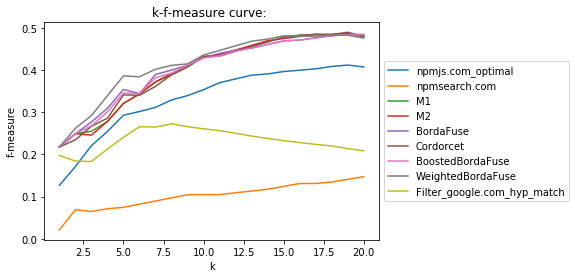

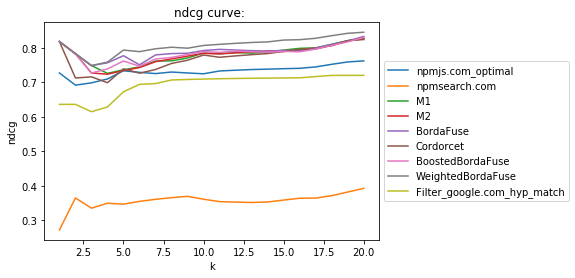

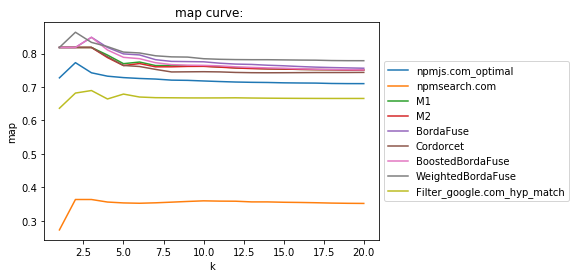

In [126]:
import matplotlib.pyplot as pl

def plplotk(pl,searcher,dataf):
        pl.plot(dataf['k'].tolist(), dataf[searcher].tolist(), label=searcher)

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_hits)
    
pl.xlabel('k')
pl.ylabel('hits')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-hit curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_precision)
    
pl.xlabel('k')
pl.ylabel('precision')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-precision curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_recall)
    
pl.xlabel('k')
pl.ylabel('recall')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-recall curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_fmeasure)
    
pl.xlabel('k')
pl.ylabel('f-measure')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-f-measure curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_ndcg_k)
    
pl.xlabel('k')
pl.ylabel('ndcg')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('ndcg curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_average_precision)
    
pl.xlabel('k')
pl.ylabel('map')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('map curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()



In [127]:
dataframe_ndcg_k.head(20)

,k,npmjs.com_optimal,npmsearch.com,M1,M2,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedBordaFuse,Filter_google.com_hyp_match
0,1,0.727273,0.272727,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.636364
1,2,0.692104,0.365253,0.783013,0.783013,0.783013,0.712677,0.783013,0.783013,0.636364
2,3,0.698644,0.335670,0.748604,0.727273,0.748604,0.716101,0.727273,0.748604,0.615033
3,4,0.709845,0.350015,0.726147,0.723686,0.756715,0.699109,0.738971,0.758865,0.628881
4,5,0.733620,0.347400,0.736535,0.734397,0.777349,0.739228,0.761932,0.793595,0.672835
5,6,0.729011,0.355333,0.744811,0.742904,0.750899,0.726687,0.746943,0.788986,0.694302
6,7,0.725515,0.361349,0.761660,0.759928,0.779487,0.737334,0.767564,0.797320,0.696538
7,8,0.730004,0.366108,0.762318,0.767978,0.783386,0.754848,0.772415,0.801808,0.706984
8,9,0.727234,0.369992,0.770835,0.776095,0.784387,0.764255,0.780624,0.799039,0.708427
9,10,0.724920,0.361669,0.785068,0.784209,0.792338,0.779231,0.788815,0.806983,0.709633


In [128]:
dataframe_average_precision.head(20)

,k,npmjs.com_optimal,npmsearch.com,M1,M2,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedBordaFuse,Filter_google.com_hyp_match
0,1,0.727273,0.272727,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.636364
1,2,0.772727,0.363636,0.818182,0.818182,0.818182,0.818182,0.818182,0.863636,0.681818
2,3,0.742424,0.363636,0.818182,0.818182,0.848485,0.818182,0.848485,0.833333,0.689394
3,4,0.732323,0.356061,0.795455,0.787879,0.818182,0.790404,0.810606,0.820707,0.664141
4,5,0.728030,0.353409,0.769697,0.764015,0.798864,0.764394,0.788636,0.804293,0.678788
5,6,0.725455,0.352424,0.774545,0.770000,0.795833,0.761212,0.784621,0.801717,0.670000
6,7,0.723709,0.353752,0.764033,0.760245,0.781609,0.752569,0.772561,0.793261,0.668045
7,8,0.720480,0.355720,0.764080,0.760292,0.776469,0.744944,0.766816,0.790033,0.667718
8,9,0.719817,0.357824,0.763475,0.761491,0.775881,0.745340,0.765218,0.789369,0.667334
9,10,0.717983,0.359635,0.762380,0.761672,0.775286,0.745684,0.764623,0.784505,0.667260
